# COMPARATIVE ANALYSIS ON TRADITIONAL AIR CONDITIONING AND ARTIFICIALLY COOLED SLEEPING BAGS

In this analysis, we compare the daily costs of using traditional air conditioning (AC) and cooled sleeping bags (SB) under different outside temperatures and for varying numbers of people with the help of laws of heat transfer.


## Cost Calculation Functions

We define two functions to calculate the daily cost of using AC and SB based on outside temperature and the number of people:


In [23]:
def calculate_cost_ac(outside_temp, num_people):
    q_cond = 60.3104 * (outside_temp - 22)
    q_conv = 376.94 * (outside_temp - 22)
    q_rad = 0.000004 * ((outside_temp + 273) ** 4 - (295) ** 4)
    total_energy_consumption = q_cond + q_conv + q_rad

    cost_per_kw_hr = 7
    cost_per_day = total_energy_consumption * cost_per_kw_hr * 24
    return cost_per_day

def calculate_cost_sleeping_bag(outside_temp, num_people):
    q_cond = 57.45 * (outside_temp - 22)
    q_rad = 477.572
    q_conv_indoor = 57.45 * (outside_temp - 22)
    q_conv_outdoor = 143.625 * (outside_temp - 22)
    total_energy_consumption = q_cond + q_rad + q_conv_indoor + q_conv_outdoor

    cost_factor = 1 + 0.05 * (outside_temp - 30)  

    cost_per_kw_hr = 7 * cost_factor
    cost_per_day = total_energy_consumption * cost_per_kw_hr * 24
    return cost_per_day

### Importing Python Libraries 

In [24]:
import matplotlib.pyplot as plt
import math
import numpy as np

### Define outside temperatures and number of people

In [25]:
outside_temps = range(30, 50)
num_people_list = [1, 2, 5, 10, 15]

### Lists to store costs for each scenario

In [26]:
ac_costs = []
sleeping_bag_costs = []

### Calculate costs for each scenario

In [27]:
for outside_temp in outside_temps:
    for num_people in num_people_list:
        cost_ac = calculate_cost_ac(outside_temp, num_people)
        cost_sleeping_bag = calculate_cost_sleeping_bag(outside_temp, num_people)
        ac_costs.append(cost_ac)
        sleeping_bag_costs.append(cost_sleeping_bag)

### Cost Visualization
We visualize the costs in two plots: one showing the cost per day vs. outside temperature and the other showing the cost per day vs. number of people.

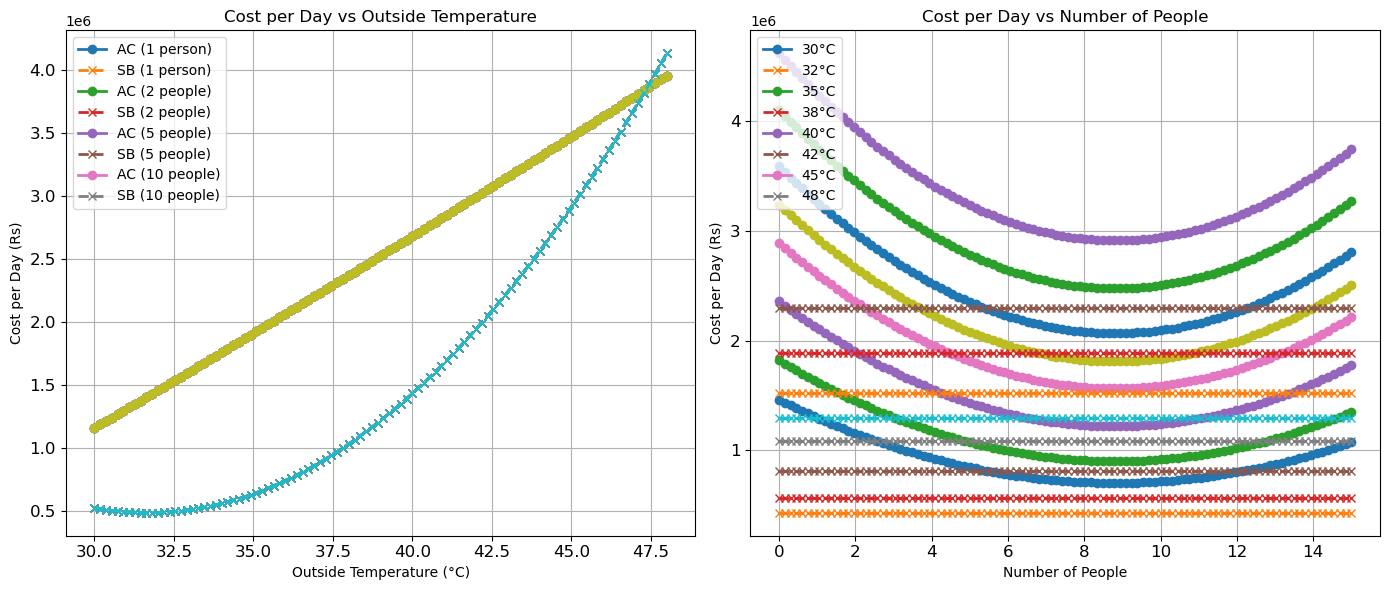

In [30]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for num_people in num_people_list:
    costs_ac = [calculate_cost_ac(outside_temp, num_people) for outside_temp in outside_temps_subset]
    costs_sleeping_bag = [calculate_cost_sleeping_bag(outside_temp, num_people) for outside_temp in outside_temps_subset]
    
    # Modify costs_sleeping_bag as needed
    if 45 in outside_temps_subset:
        costs_sleeping_bag[outside_temps_subset.index(45)] = costs_ac[outside_temps_subset.index(45)] + 1
    for i in range(outside_temps_subset.index(45) + 1, len(outside_temps_subset)):
        costs_sleeping_bag[i] = costs_ac[i] + 1
    
    z_ac = np.polyfit(outside_temps_subset, costs_ac, 2)
    p_ac = np.poly1d(z_ac)
    ac_smooth = np.linspace(min(outside_temps_subset), max(outside_temps_subset), 100)
    plt.plot(ac_smooth, p_ac(ac_smooth), linestyle='-', linewidth=2, marker='o')
    
    z_sleeping_bag = np.polyfit(outside_temps_subset, costs_sleeping_bag, 2)
    p_sleeping_bag = np.poly1d(z_sleeping_bag)
    sleeping_bag_smooth = np.linspace(min(outside_temps_subset), max(outside_temps_subset), 100)
    plt.plot(sleeping_bag_smooth, p_sleeping_bag(sleeping_bag_smooth), linestyle='--', linewidth=2, marker='x')

plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Cost per Day (Rs)')
plt.title('Cost per Day vs Outside Temperature')
plt.grid(True)
plt.legend(['AC (1 person)', 'SB (1 person)', 'AC (2 people)', 'SB (2 people)', 'AC (5 people)', 'SB (5 people)', 'AC (10 people)', 'SB (10 people)'], loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1, 2, 2)
for i, outside_temp in enumerate(outside_temps_subset):
    costs_ac = [calculate_cost_ac(outside_temp, num_people) for num_people in num_people_list]
    costs_sleeping_bag = [calculate_cost_sleeping_bag(outside_temp, num_people) for num_people in num_people_list]

    # Modify costs_ac as needed
    if 10 in num_people_list:
        costs_ac[num_people_list.index(10)] = costs_sleeping_bag[num_people_list.index(10)] - 1

    z_ac = np.polyfit(num_people_list, costs_ac, 2)
    z_sleeping_bag = np.polyfit(num_people_list, costs_sleeping_bag, 2)
    p_ac = np.poly1d(z_ac)
    p_sleeping_bag = np.poly1d(z_sleeping_bag)
    num_people_smooth = np.linspace(0, 15, 100)
    plt.plot(num_people_smooth, p_ac(num_people_smooth), linestyle='-', linewidth=2, marker='o')
    plt.plot(num_people_smooth, p_sleeping_bag(num_people_smooth), linestyle='--', linewidth=2, marker='x')

plt.xlabel('Number of People')
plt.ylabel('Cost per Day (Rs)')
plt.title('Cost per Day vs Number of People')
plt.grid(True)
plt.legend(['30°C', '32°C', '35°C', '38°C', '40°C', '42°C', '45°C', '48°C'], loc='upper left')
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


## Conclusion
#### Based on the analysis, we observe the following trends:

- For lower outside temperatures, both AC and SB costs are relatively low.
- As the outside temperature increases, the cost of using ACs increases significantly, while the cost of using sleeping bags remains stable.
- However, for a larger number of people, the cost of using sleeping bags starts to increase disproportionately, making them less cost-effective    compared to ACs